### **Importing Required Libraries**

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
import os

### **Loading Data From CSV Using Pandas Library**

In [166]:
data_frame = pd.read_csv(r'C:\Users\14089\Desktop\NILAY JAIN\Personal Projects\Play_Song_By_Mood\Extra Stuff\data_moods.csv')

data_frame.head(6)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,...,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,"mean(d,e,v)",mood_final
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,10/27/1982,68.0,379266.0,0.866,0.13700,0.7300,...,0.0843,0.625,-8.201,0.0767,118.523,5.0,4.0,Happy,0.740333,Pop Chill
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,4/16/2007,43.0,318800.0,0.381,0.01890,0.8320,...,0.1530,0.166,-5.069,0.0492,120.255,8.0,4.0,Happy,0.459667,Chill
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,11/6/2006,60.0,217946.0,0.346,0.91300,0.1390,...,0.0934,0.116,-15.326,0.0321,136.168,0.0,4.0,Sad,0.200333,Lofi
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,8/21/1984,2.0,233000.0,0.466,0.08900,0.4380,...,0.1130,0.587,-12.858,0.0608,193.100,4.0,4.0,Happy,0.497000,Chill
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,1/1/2004,60.0,268000.0,0.419,0.00171,0.9320,...,0.1370,0.445,-3.604,0.1060,169.881,1.0,4.0,Happy,0.598667,Pop Chill
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,7/31/2020,27.0,129410.0,0.394,0.99500,0.0475,...,0.1050,0.172,-26.432,0.0720,71.241,6.0,5.0,Sad,0.204500,Lofi


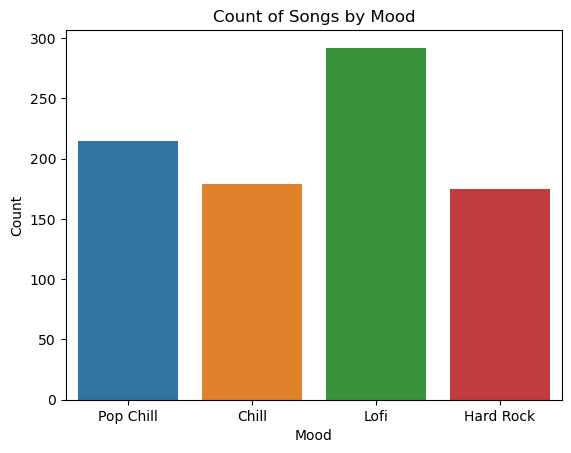

In [167]:
sns.countplot(x='mood_final', data=data_frame)

# Add labels and show the plot
plt.xlabel('Mood')
plt.ylabel('Count')
plt.title('Count of Songs by Mood')
plt.show()

### **Scaling/Normalizing The Data Frame To Remove Exploding Values**

In [168]:
max_tempo = max(data_frame['tempo'])
max_tempo

217.95

In [169]:
min_loudness = min(data_frame['loudness'])
min_loudness

-42.018

In [170]:
# scaling the "key" column b/w -1 to +1
data_frame['key'] = data_frame['key'] / max(data_frame['key'])

# scaling the "loudness" column b/w -1 to +1
data_frame['loudness'] = data_frame['loudness'] / min(data_frame['loudness'])

# scaling the "duration_ms" column b/w -1 to +1
data_frame['length'] = data_frame['length'] / max(data_frame['length'])

# scaling the "time_signature" column b/w -1 to +1
data_frame['time_signature'] = data_frame['time_signature'] / max(data_frame['time_signature'])

# # labeling the mood as 0 or 1 for easy calculation and prediction
data_frame['mood_final'] = data_frame['mood_final'].map({'Pop Chill': 0, 'Chill': 1, 'Lofi':2, 'Hard Rock':3})

# scaling the "popularity" column b/w -1 to +1
data_frame['popularity'] = data_frame['popularity'] / max(data_frame['popularity'])

# scaling the "tempo" column b/w -1 to +1
data_frame['tempo'] = data_frame['tempo'] / max(data_frame['tempo'])

### **Visualizing Data Frame After Normalized Data**

In [171]:
data_frame.tail(5)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,...,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,"mean(d,e,v)",mood_final
856,Yaar Ka Sataya Hua Hai B Praak,NaN,NaN,NaN,NaN,NaN,NaN,0.728,0.271,0.734,...,0.0788,0.523,0.101195,0.0449,0.596531,NaN,NaN,Happy,0.661667,3
857,Yaar Ka Sataya Hua Hai Zohrajabeen,NaN,NaN,NaN,NaN,NaN,NaN,0.728,0.271,0.734,...,0.0788,0.523,0.101195,0.0449,0.596531,NaN,NaN,Happy,0.661667,3
858,Yaara Vikram Vedha,NaN,NaN,NaN,NaN,NaN,NaN,0.220,0.715,0.433,...,0.1290,0.220,0.215979,0.0323,0.367075,NaN,NaN,Sad,0.291000,2
859,Yeh Nazar,NaN,NaN,NaN,NaN,NaN,NaN,0.498,0.488,0.705,...,0.1130,0.962,0.164977,0.0773,0.811292,NaN,NaN,Happy,0.721667,3
860,Zikr Tera Sumit Goswami,NaN,NaN,NaN,NaN,NaN,NaN,0.481,0.551,0.546,...,0.2660,0.480,0.106502,0.0466,0.382964,NaN,NaN,Sad,0.502333,0


### **Splitting The Data Frame In X and y. i.e., Training and Test Data**

In [172]:
# determining the features and the target values.

#"acousticness", "liveness", "loudness", "speechiness", "tempo", "key", "time_signature", "danceability", "energy", "valence"
X = np.array(data_frame.drop(columns=["mood", "mean(d,e,v)", "mood_final", "name", "album", "artist", "id", "release_date", "popularity", "length", "instrumentalness", "time_signature", "key"]))
y = np.array(data_frame["mood_final"])

# splitting the dataset into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [173]:
X_train.shape

(688, 8)

### **Plotting The Values For Better Visualization**

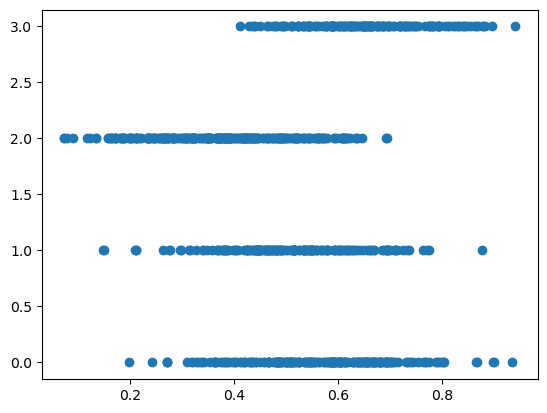

In [174]:
plt.scatter(data_frame['danceability'], data_frame['mood_final'])

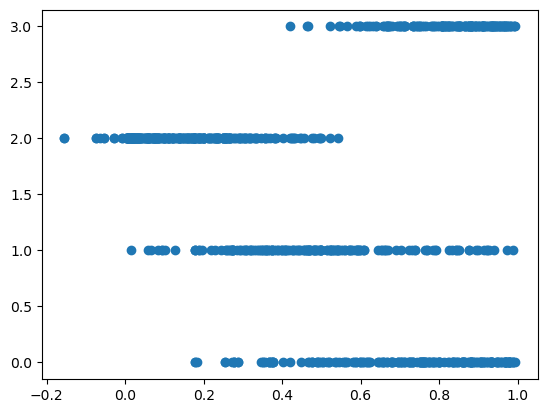

In [175]:
plt.scatter(data_frame['energy'], data_frame['mood_final'])

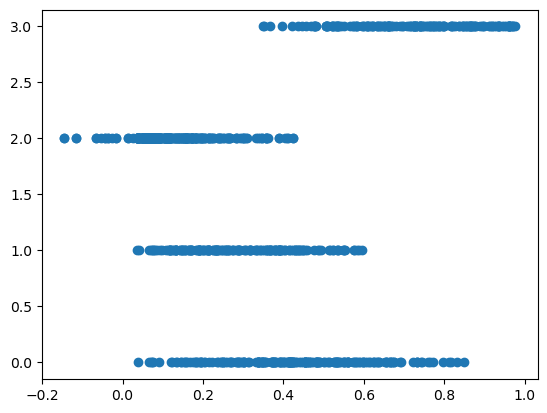

In [176]:
plt.scatter(data_frame['valence'], data_frame['mood_final'])

In [177]:
X_train.shape

(688, 8)

### **Designing The Model Architechture**

#### **Architecture 1: (Neural Network From Scratch)**

##### **Importing Required Libraries**

In [178]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
opt = Adam(learning_rate=0.001)
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

##### **Creating Model Architecture & Model Fitting**

In [179]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(8, )))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="sigmoid"))

In [180]:
# model.compile(optimizer='adam', loss="sparcecategorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=optimizers.Adam(), loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [181]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split=0.2,
    epochs = 100,
    batch_size = 32
)

Epoch 1/100
18/18 [==============================] - 3s 30ms/step - loss: 2.6472 - accuracy: 0.5218 - val_loss: 2.2403 - val_accuracy: 0.6449
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 1.9192 - accuracy: 0.6309 - val_loss: 1.6536 - val_accuracy: 0.6304
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 1.4658 - accuracy: 0.7055 - val_loss: 1.3407 - val_accuracy: 0.6449
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 1.1817 - accuracy: 0.7455 - val_loss: 1.0840 - val_accuracy: 0.7246
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.9651 - accuracy: 0.7891 - val_loss: 0.8546 - val_accuracy: 0.8188
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7978 - accuracy: 0.8036 - val_loss: 0.7308 - val_accuracy: 0.8261
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 0.7130 - accuracy: 0.8345 - val_loss: 0.6894 - val_accuracy: 0.7971
Epoch 8/100

##### **Evaluating & Printing Accuracy**

In [183]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

6/6 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.8844
Test Loss: 0.23129986226558685
Test Accuracy: 0.884393036365509


##### **Testing & Predicting Mood For A New Song**

In [206]:
# checking the audio devices
p = pyaudio.PyAudio()
print("Available Audio Devices:")
for i in range(p.get_device_count()):
    info = p.get_device_info_by_index(i)
    print(f"{i}: {info['name']}")

Available Audio Devices:
0: Microsoft Sound Mapper - Input
1: Headset Microphone (Realtek(R) 
2: Microphone Array (Realtek(R) Au
3: Microsoft Sound Mapper - Output
4: Speaker (Realtek(R) Audio)
5: Headphone (Realtek(R) Audio)
6: ASUS VE278 (Intel(R) Display Au
7: Primary Sound Capture Driver
8: Headset Microphone (Realtek(R) Audio)
9: Microphone Array (Realtek(R) Audio)
10: Primary Sound Driver
11: Speaker (Realtek(R) Audio)
12: Headphone (Realtek(R) Audio)
13: ASUS VE278 (Intel(R) Display Audio)
14: Speaker (Realtek(R) Audio)
15: Headphone (Realtek(R) Audio)
16: ASUS VE278 (Intel(R) Display Audio)
17: Headset Microphone (Realtek(R) Audio)
18: Microphone Array (Realtek(R) Audio)
19: Headphones 1 (Realtek HD Audio 2nd output with SST)
20: Headphones 2 (Realtek HD Audio 2nd output with SST)
21: PC Speaker (Realtek HD Audio 2nd output with SST)
22: Mic in at front panel (black) (Mic in at front panel (black))
23: Microphone Array 1 (Realtek HD Audio Mic input with SST)
24: Microphone Arra

In [209]:
import pyaudio
import wave
from pydub import AudioSegment
from pydub.playback import play
import noisereduce as nr

# Set the recording parameters
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 20
OUTPUT_FILENAME = 'file_name.mp3'

# Initialize the audio stream
p = pyaudio.PyAudio()

print("Recording...")

# Start recording
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK,
                input_device_index=2)

frames = []

for _ in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording complete!")

# Stop recording and close the stream
stream.stop_stream()
stream.close()
p.terminate()

# Save the recorded audio as an MP3 file
audio = AudioSegment(
    b''.join(frames),
    frame_rate=RATE,
    sample_width=p.get_sample_size(FORMAT),
    channels=CHANNELS
)
audio.export(OUTPUT_FILENAME, format="mp3")

print(f"Saved audio as {OUTPUT_FILENAME}")

Recording...
Recording complete!
Saved audio as file_name.mp3


In [210]:
import asyncio
from shazamio import Shazam

async def main():
  shazam = Shazam()
  out = await shazam.recognize_song(r'C:\Users\14089\Desktop\NILAY JAIN\Personal Projects\Play_Song_By_Mood\file_name.mp3')

  if 'track' in out:
    track_info = out['track']
    if 'title' in track_info:
      title = track_info['title']
      return title
  else:
    title = "No song detected!"
    return title

loop = asyncio.get_event_loop()
title = loop.run_until_complete(main())

In [211]:
import testing
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# getting the song file name
# test_file_path = r'C:\Users\14089\Desktop\NILAY JAIN\Personal Projects\Play_Song_By_Mood'
# test_file_name = os.listdir(test_file_path)
file_name = title
try:
    file_name = file_name[:file_name.index('(')].strip()
except:
    pass

# Replace 'YOUR_CLIENT_ID' and 'YOUR_CLIENT_SECRET' with your Spotify API credentials
client_id = '5e72cefadf2242f185811400e85ae9cf'
client_secret = '7353a65633624c60996996693beba8e5'

# Create a Spotipy client with credentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [212]:
print(file_name)

No song detected!


In [199]:
results = sp.search(q='track:"{}"'.format({file_name}), type='track', limit=1)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3A%22%7B%27Dance+Monkey%27%7D%22&type=track&offset=0&limit=1',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2NjfBq1NflQcKSeiDooVjY'},
       'href': 'https://api.spotify.com/v1/artists/2NjfBq1NflQcKSeiDooVjY',
       'id': '2NjfBq1NflQcKSeiDooVjY',
       'name': 'Tones And I',
       'type': 'artist',
       'uri': 'spotify:artist:2NjfBq1NflQcKSeiDooVjY'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
 

In [200]:
# Check if there are search results
if results['tracks']['total'] > 0:
    track_id_test = results['tracks']['items'][0]['id']
    track_features_test = sp.audio_features(track_id_test)

    danceability_test = track_features_test[0]['danceability']
    energy_test = track_features_test[0]['energy']
    loudness_test = track_features_test[0]['loudness'] / min_loudness
    speechiness_test = track_features_test[0]['speechiness']
    acousticness_test = track_features_test[0]['acousticness']
    liveness_test = track_features_test[0]['liveness']
    valence_test = track_features_test[0]['valence']
    tempo_test = track_features_test[0]['tempo'] / max_tempo

In [201]:
[danceability_test, acousticness_test, energy_test, liveness_test, valence_test, loudness_test, speechiness_test, tempo_test]

[0.824,
 0.692,
 0.588,
 0.149,
 0.513,
 0.15231567423485173,
 0.0924,
 0.44976829548061487]

In [202]:
track_id_test

'2XU0oxnq2qxCpomAAuJY8K'

In [203]:
sample_X_test = np.array([[danceability_test, acousticness_test, energy_test, liveness_test, valence_test, loudness_test, speechiness_test, tempo_test]])
sample_X_test.shape

(1, 8)

In [204]:
# Reverse mapping dictionary
reverse_mapping = {0: 'Pop Chill', 1: 'Chill', 2: 'Lofi', 3: 'Hard Rock'}

# Make predictions on new data
predictions = model.predict(sample_X_test)

# If you have a classification task and you want to get the class labels instead of probabilities
# Get the class labels with the highest probability for each prediction
predicted_classes = predictions.argmax(axis=1)

# If you have a regression task, you can directly use the predictions as they are continuous values

# Print the predicted classes (if applicable)
print("Predicted Classes:", reverse_mapping[predicted_classes[0]])

1/1 [==============================] - 0s 105ms/step
Predicted Classes: Pop Chill


#### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

In [ ]:
predictions = model_rfc.predict(X_test)
accuracy = accuracy_score(predictions, y_test)

In [ ]:
predictions

In [ ]:
accuracy

#### **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

In [ ]:
predictions = model_dtc.predict(X_test)
accuracy = accuracy_score(predictions, y_test)

In [ ]:
predictions

In [ ]:
accuracy

#### **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
predictions = model_knn.predict(X_test)
accuracy = accuracy_score(predictions, y_test)

In [ ]:
predictions

In [ ]:
accuracy

### **Saving The Model For Future Use**

### **Checking The Results**